Connecting to db

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import sys; sys.path.append("C:\\Users\\divya\\OneDrive\\Desktop\\dynamic_pricing_project")
import src.sql_queries as q
sns.set(style="whitegrid")
conn = sqlite3.connect("../data/retail.db")


Monthly Sales Plot

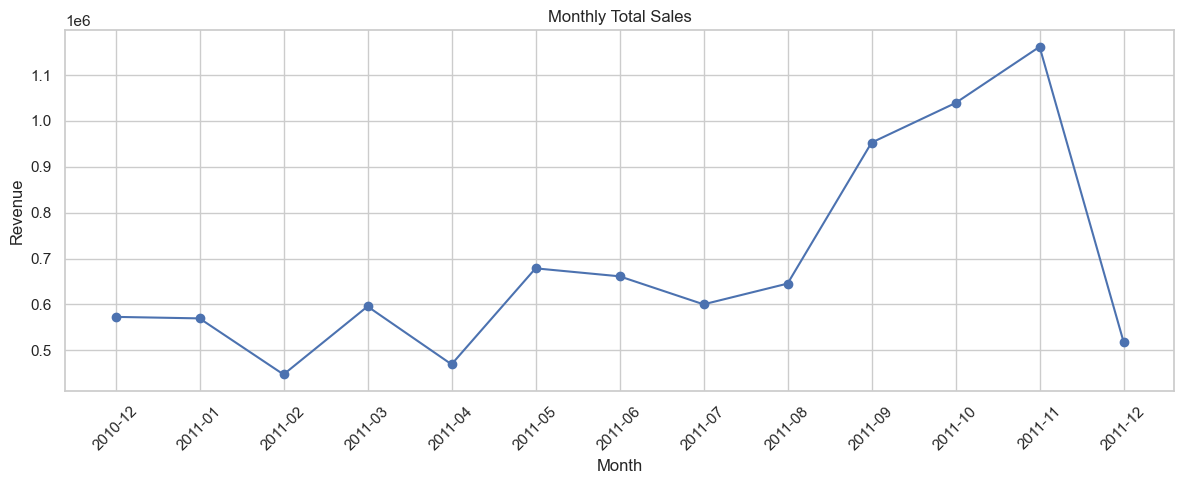

In [2]:
monthly_sales = pd.read_sql(q.monthly_sales_query, conn)
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales["Month"], monthly_sales["TotalSales"], marker='o')
plt.title("Monthly Total Sales")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../reports/monthly_sales_plot.png")
plt.show()


Top Products

C:\Users\divya\AppData\Local\Temp\ipykernel_16764\795188997.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x="Revenue", y="Description", palette="viridis")


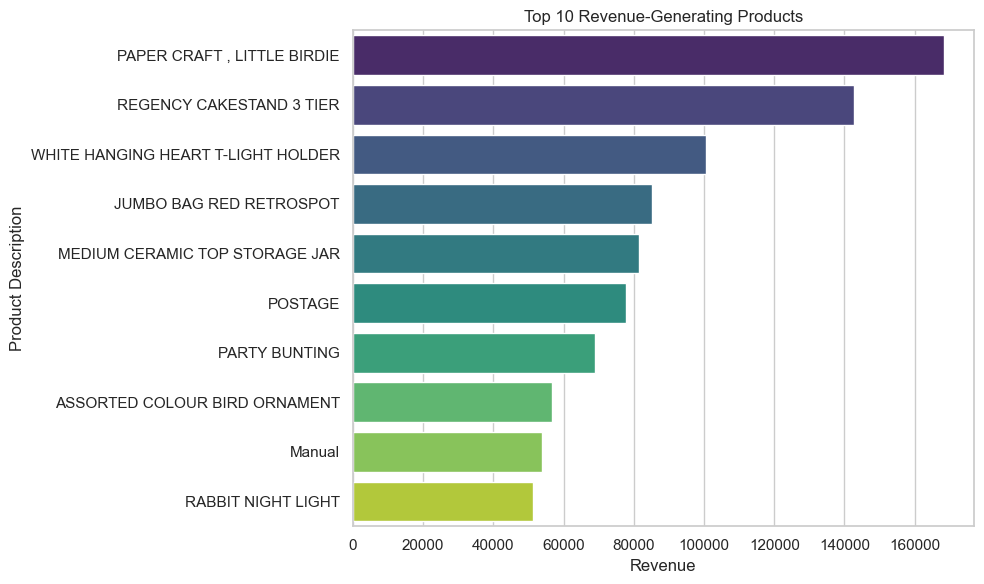

,Description,Revenue,RevenueShare
0,"PAPER CRAFT , LITTLE BIRDIE",168469.60,1.89%
1,REGENCY CAKESTAND 3 TIER,142592.95,1.6%
2,WHITE HANGING HEART T-LIGHT HOLDER,100448.15,1.13%
3,JUMBO BAG RED RETROSPOT,85220.78,0.96%
4,MEDIUM CERAMIC TOP STORAGE JAR,81416.73,0.91%
5,POSTAGE,77803.96,0.87%
6,PARTY BUNTING,68844.33,0.77%
7,ASSORTED COLOUR BIRD ORNAMENT,56580.34,0.63%
8,Manual,53779.93,0.6%
9,RABBIT NIGHT LIGHT,51346.20,0.58%


In [5]:
top_products = pd.read_sql(q.top_products_query, conn)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x="Revenue", y="Description", palette="viridis")
plt.title("Top 10 Revenue-Generating Products")
plt.xlabel("Revenue")
plt.ylabel("Product Description")
plt.tight_layout()
plt.savefig("../reports/top_products_bar.png")
plt.show()
total_revenue_query = """
SELECT SUM(Quantity * UnitPrice) as TotalRevenue
FROM transactions;
"""
total_revenue = pd.read_sql(total_revenue_query, conn).iloc[0]['TotalRevenue']
top_products['RevenueShare'] = round(100 * top_products['Revenue'] / total_revenue, 2)
top_products['RevenueShare'] = top_products['RevenueShare'].astype(str) + '%'
top_products

Average order by country

C:\Users\divya\AppData\Local\Temp\ipykernel_16764\3310759205.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_order.head(10), x="AvgOrderValue", y="Country", palette="crest")


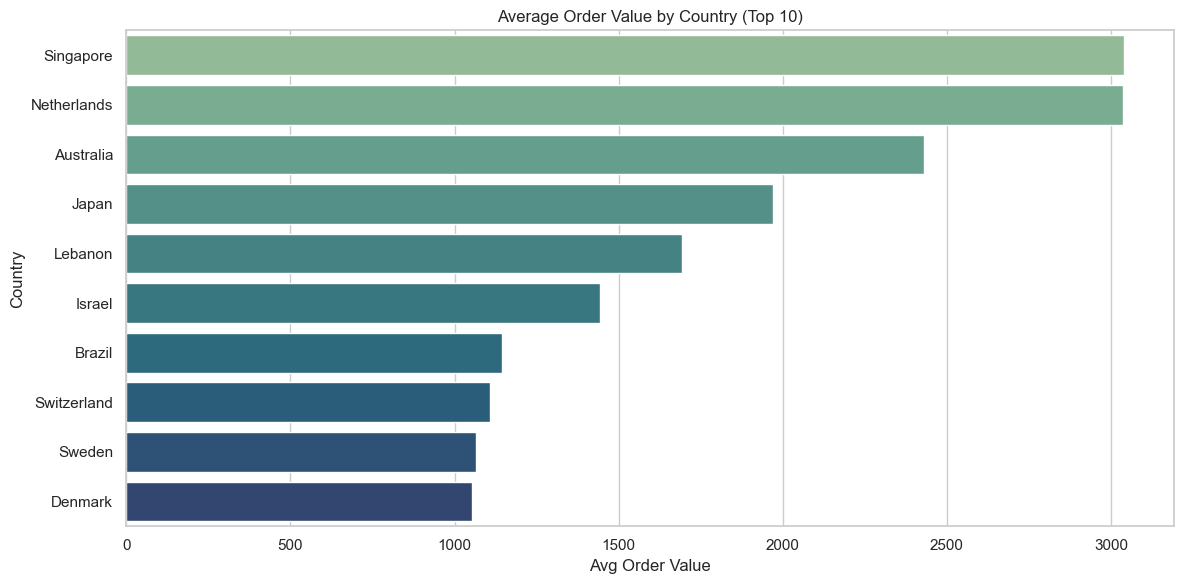

In [4]:
avg_order = pd.read_sql(q.avg_order_value_query, conn)
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_order.head(10), x="AvgOrderValue", y="Country", palette="crest")
plt.title("Average Order Value by Country (Top 10)")
plt.xlabel("Avg Order Value")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


Key Business Insights

- Monthly Sales peak around November–December, likely due to holiday shopping.
- Top-selling product is PAPER CRAFT , LITTLE BIRDIE , contributing 1.89% of revenue.This indicates a long tail revenue distribution: revenue comes from many products rather than just a few.
- Average order value is highest in Netherlands, possibly due to bulk orders.
